## 1 **Introdução**
Nos últimos dois meses, houve uma grande discussão sobre o incêndio na floresta amazônica, muitas revistas e sites publicaram diversos materiais e opiniões sobre o assunto, nosso objetivo aqui não é fazer o mesmo, mas sim dar uma olhada em alguns dados publicados no site do INPE (Instituto Nacional de Pesquisas Espaciais) e tentar ver se há algo incomum.

###  **1.1 importando bibliotecas**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import warnings
import numpy as np

In [0]:
#para dar upload do arquivo no colab
from google.colab import files
uploaded = files.upload()

Saving Incendios_florestais.xlsx to Incendios_florestais.xlsx


In [0]:
fires_mo = pd.read_excel('Incendios_florestais.xlsx')

In [15]:
fires_mo

,Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total
0,1998,-,-,-,-,-,3551,8067,35551,41976,23499,6804,4448,123896
1,1999,1081,1284,667,717,1811,3632,8758,39492,36914,27017,8863,4376,134612
2,2000,778,562,848,538,2097,6274,4740,22204,23293,27332,8399,4465,101530
3,2001,547,1060,1267,1081,2090,8405,6488,31838,39829,31039,15640,6200,145484
4,2002,1653,1569,1678,1683,3816,10845,18080,72412,93417,59258,39913,17092,321416
5,2003,6697,3100,3549,3643,6448,16752,30391,57004,97758,57495,35422,22980,341239
6,2004,3883,1932,2928,2956,6609,18024,30356,64067,121395,54292,45364,28640,380446
7,2005,7058,2898,2529,2743,5075,7854,30238,90729,102455,65023,31631,14333,362566
8,2006,4532,2388,2427,2269,4313,7601,17788,54630,76475,32043,29303,15415,249184
9,2007,4220,2761,3340,2550,5123,12716,19931,91085,141220,67228,31421,12320,393915


## **2 Plotando informaçoes**




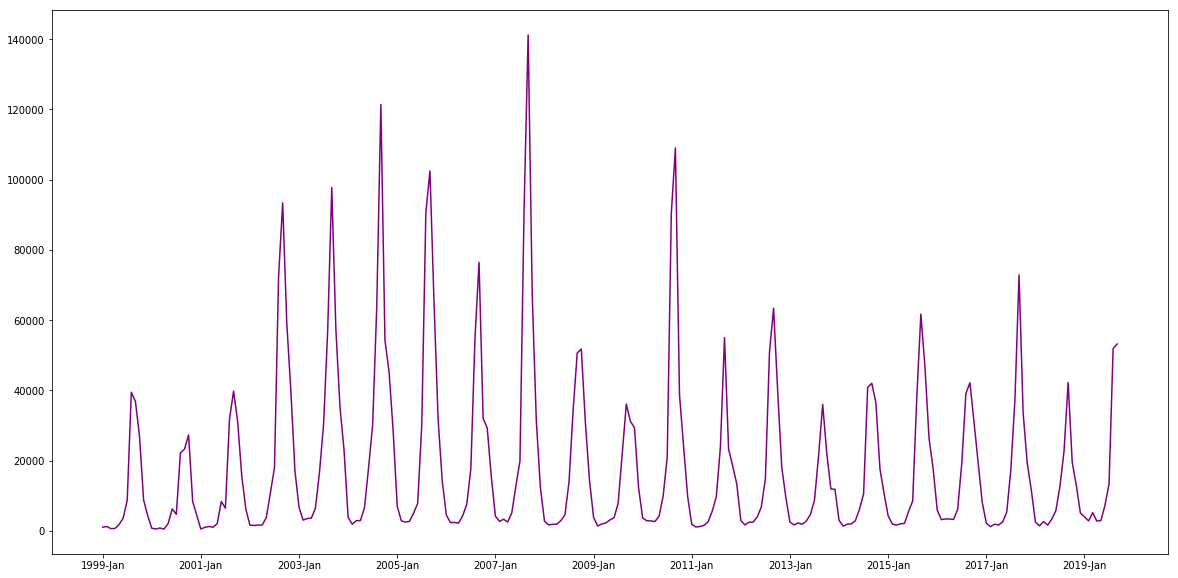

In [16]:
#Selecionando a partir de 1999 
fires_mo_c = fires_mo.iloc[1:,:13]

#Removendo as 3 ultimas linhas
fires_mo_c = fires_mo_c.iloc[:21]

time = fires_mo_c.Ano.loc[0:21]
months = []

for i in range(fires_mo_c.iloc[:,1:].shape[0]):
    months += [fires_mo_c.iloc[i,1:]]    

#Concatenando as listas   
long_ts = pd.DataFrame(pd.concat(months, axis=0))


#Gerando as datas novamente
long_ts = long_ts.set_index(pd.date_range('1999-01','2019-12',freq='MS').strftime("%Y-%b"))
long_ts.columns = ['Fires']

#Lidando com valores inexistentes na tabela
long_ts[long_ts.Fires=='-']=0


#Transformando em tipo numerico   
long_ts = long_ts.astype(int)

#Eliminando os 2 últimos zeros e outubro pois ele ainda não acabou
long_ts = long_ts[:-3]

    
# Plotando
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(long_ts.index,
        long_ts['Fires'],
        color='purple')
ax.xaxis.set_major_locator(ticker.MultipleLocator(24))




As queimadas parecem bastante sazonais, indicando que há momentos no ano em que o número de queimadas é maior. Por exemplo, no meio do ano o número de queimadas é maior, enquanto no ínicio e no final é perto de zero.

Também é notório que que de 2001 para 2007 houve um grande crescimento, atingindo o seu pico em 2007.

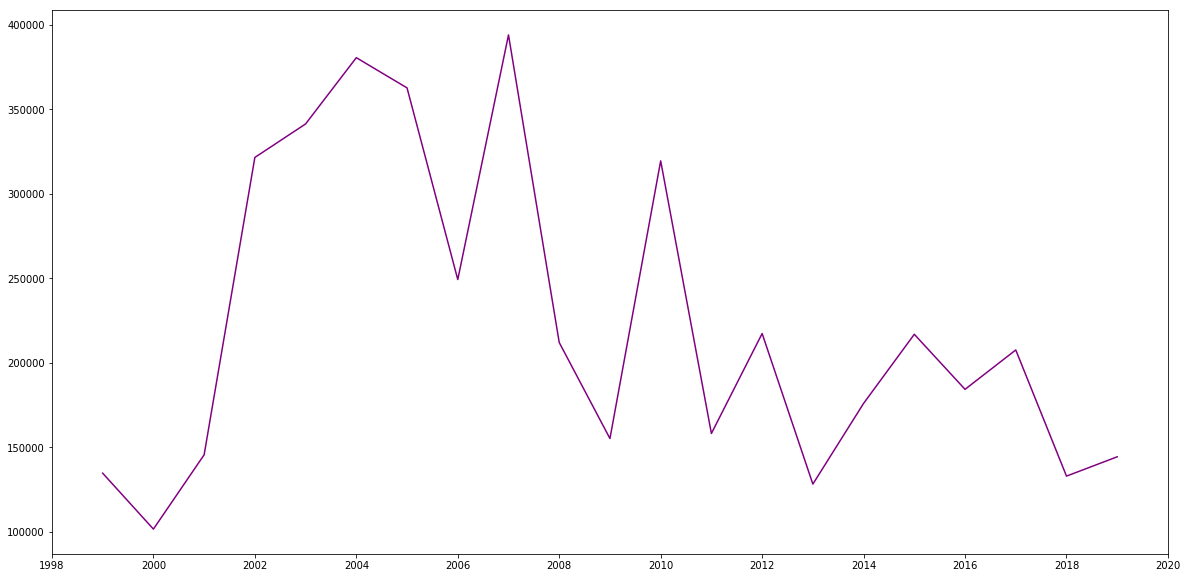

In [17]:
#Pegando dados entre 1999 e 2019
fires_mo_tot = pd.DataFrame(fires_mo.Total[1:22])

#Mudando o index
fires_mo_tot = fires_mo_tot.set_index(time)

# Plotando
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(fires_mo_tot.index.astype(int),
        fires_mo_tot['Total'],
        color='purple')
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))


Ok, ao que parece, nos últimos anos, era muito maior do que agora, mas isso não é desculpa para nenhum surto de incêndio, ainda mais porque 2019 nem acabou e já é maior que 2018! Ainda temos alguns meses para terminar este ano e meu maior medo é que ele se torne muito maior que 2018. Agora iremos olhar em quais meses os surtos de queima ocorrem com mais frequência?

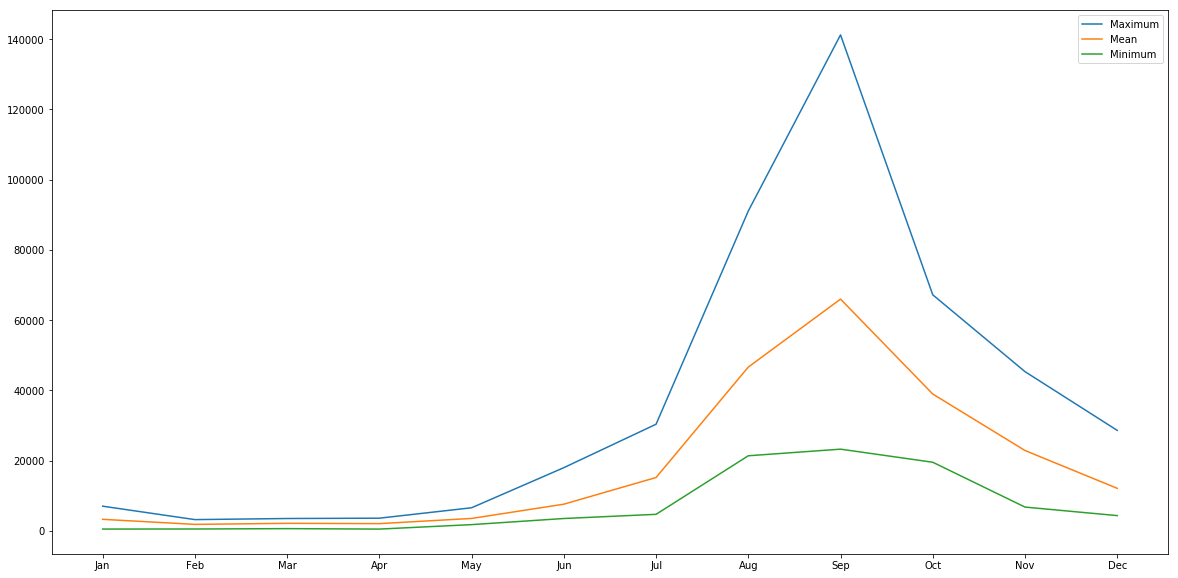

In [18]:


#plotando valores máximos, mínimos e a média

fires_stats = np.transpose(fires_mo.iloc[-3:,1:13]).astype('int')
fires_stats.columns = ['Maximum', 'Mean', 'Minimum']

fires_stats = fires_stats.set_index(pd.date_range('1999-01','1999-12',freq='MS').strftime("%b"))


fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(fires_stats.index,
        fires_stats['Maximum'],
        fires_stats.index,
        fires_stats['Mean'],
        fires_stats.index,
        fires_stats['Minimum'], label='sine')
ax.legend(('Maximum','Mean', 'Minimum'))



Parece que os meses entre julho e outubro, com pico em setembro, os surtos tendem a aumentar, é exatamente quando as notícias e os líderes mundiais começam a falar sobre a situação na floresta.